## Exploratory Data Analysis on Fairface Dataset
Source: https://github.com/dchen236/FairFace/blob/master/README.md

### About Data
Images (train + validation set): [Padding=0.25](https://drive.google.com/file/d/1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86/view), [Padding=1.25](https://drive.google.com/file/d/1g7qNOZz9wC7OfOhcPqH1EZ5bk1UFGmlL/view)\
- Padding =0.25 in the main experiments (less margin)
- Padding =1.25 for the bias experiments

Labels: [Train](https://drive.google.com/file/d/1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH/view), [Validation](https://drive.google.com/file/d/1wOdja-ezstMEp81tX1a-EYkFebev4h7D/view)

License: CC BY 4.0

Notes
The models and scripts were tested on a device with 8Gb GPU, it takes under 2 seconds to predict the 5 images in the test folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import importlib.util
import sys
import os
import io
import requests
from sklearn.preprocessing import LabelEncoder

#%pip install pandas_profiling
#%pip install typing_extensions
#from pandas_profiling import ProfileReport


#### Labels

In [178]:
# Load the training label dataset
train_file_id = '1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH'
valid_file_id = '1wOdja-ezstMEp81tX1a-EYkFebev4h7D'
train_url = f'https://drive.google.com/uc?export=download&id={train_file_id}'
valid_url = f'https://drive.google.com/uc?export=download&id={valid_file_id}'
train_response = requests.get(train_url)
valid_response = requests.get(valid_url)
train_ds = pd.read_csv(io.StringIO(train_response.text))
valid_ds = pd.read_csv(io.StringIO(valid_response.text))
all_labels = pd.concat([train_ds, valid_ds], axis = 0)
balanced_labels = all_labels.query("service_test == True")

In [9]:
display(all_labels.info())
display(all_labels.describe())
display(all_labels.head())

<class 'pandas.core.frame.DataFrame'>
Index: 97698 entries, 0 to 10953
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          97698 non-null  object
 1   age           97698 non-null  object
 2   gender        97698 non-null  object
 3   race          97698 non-null  object
 4   service_test  97698 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 3.8+ MB


None

,file,age,gender,race,service_test
count,97698,97698,97698,97698,97698
unique,97698,9,2,7,2
top,train/1.jpg,20-29,Male,White,False
freq,1,28898,51778,18612,52284


,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


In [78]:
display(balanced_labels.info())
display(balanced_labels.describe())
display(balanced_labels.head())

<class 'pandas.core.frame.DataFrame'>
Index: 45414 entries, 0 to 10953
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          45414 non-null  object
 1   age           45414 non-null  object
 2   gender        45414 non-null  object
 3   race          45414 non-null  object
 4   service_test  45414 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.8+ MB


None

,file,age,gender,race,service_test
count,45414,45414,45414,45414,45414
unique,45414,9,2,7,1
top,train/1.jpg,20-29,Male,White,True
freq,1,16953,22764,6511,45414


,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True
5,train/6.jpg,20-29,Male,White,True
7,train/8.jpg,30-39,Female,Indian,True


In [10]:
# Check for missing values
all_labels.isnull().sum()


file            0
age             0
gender          0
race            0
service_test    0
dtype: int64

In [9]:
# Drop 'file' column
train_ds = train_ds.drop(columns=['file'])



In [161]:
all_labels.head()

,file,age,gender,race,service_test
0,train/1.jpg,NaN,1,1,True
1,train/2.jpg,NaN,0,2,False
2,train/3.jpg,NaN,0,0,False
3,train/4.jpg,NaN,0,2,True
4,train/5.jpg,NaN,0,2,True


In [165]:
age_mapping = {
    '0-2': 1, '3-9': 2, '10-19': 3, '20-29': 4, '30-39': 5,
    '40-49': 6, '50-59': 7, '60-69': 8, '70+': 9
}
all_labels.loc[:, 'age'] = all_labels.age.map(age_mapping)
balanced_labels.loc[:, 'age'] = balanced_labels.age.map(age_mapping)

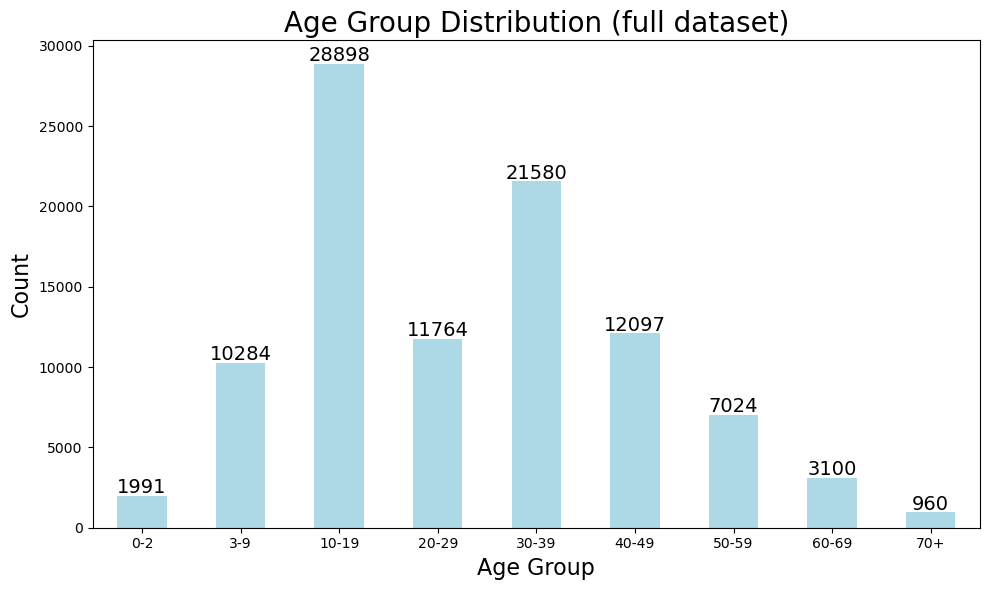

In [163]:
# Count frequency of 'age group'
age_count = all_labels['age'].value_counts().sort_index()

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 6))
age_count.plot(kind='bar', ax=ax, rot=0, color='lightblue')
plt.xlabel('Age Group', size = 16)
plt.ylabel('Count', size = 16)

# Count frequency of 'age group'
labels = [key for key, _ in sorted(age_mapping.items(), key=lambda item: item[1])]
ax.set_xticklabels(labels[:len(age_count)])  # Ensure the number of labels matches the number of ticks
plt.title('Age Group Distribution (full dataset)', size = 20)
plt.tight_layout()

# show values on each bar
for i, count in enumerate(age_count):
	ax.text(i, count + 500, str(count), ha='center', va='center', size = 14)
#plt.savefig('age_dist_all.png')

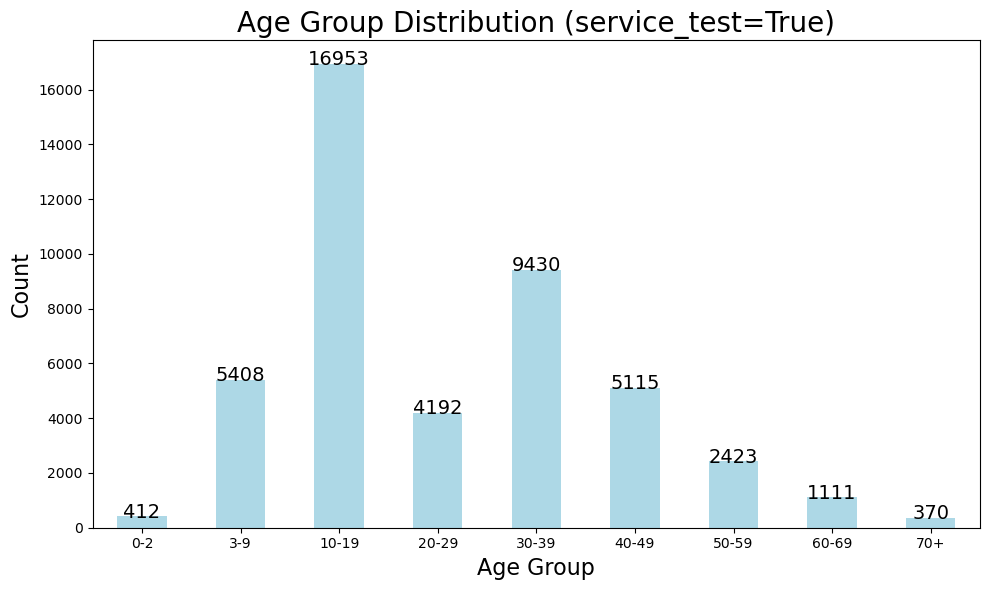

In [133]:
# Count frequency of 'age group'
age_count = balanced_labels['age'].value_counts().sort_index()

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 6))
age_count.plot(kind='bar', ax=ax, rot=0, color='lightblue')
plt.xlabel('Age Group', size = 16)
plt.ylabel('Count', size = 16)

# Count frequency of 'age group'
labels = [key for key, _ in sorted(age_mapping.items(), key=lambda item: item[1])]
ax.set_xticklabels(labels[:len(age_count)])  # Ensure the number of labels matches the number of ticks
plt.title('Age Group Distribution (service_test=True)', size = 20)
plt.tight_layout()

# show values on each bar
for i, count in enumerate(age_count):
	ax.text(i, count + 500, str(count), ha='center', va='top', size = 14)
plt.savefig('age_dist_st.png')

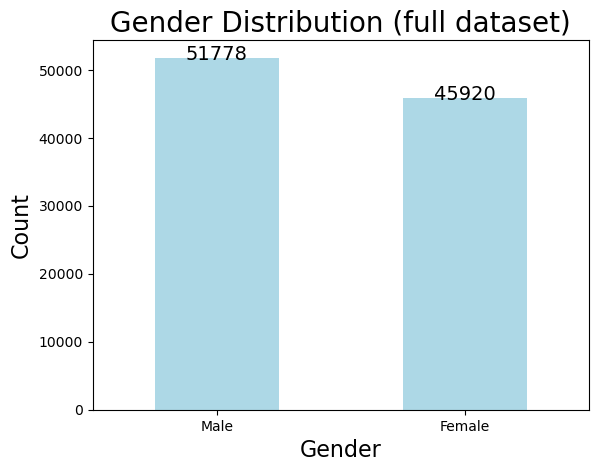

In [107]:
# Count frequency of 'gender'
all_labels['gender'].value_counts()

# Plot the histogram
all_labels['gender'].value_counts().plot(kind='bar', color = 'lightblue', rot = 0)
plt.xlabel('Gender', size = 16)
plt.ylabel('Count', size = 16)
plt.title('Gender Distribution (full dataset)', size = 20)

# show values on each bar
for i, count in enumerate(all_labels['gender'].value_counts()):
    plt.text(i, count + 500, str(count), ha='center', va='center', size = 14)
#plt.savefig('gender_dist_all.png')

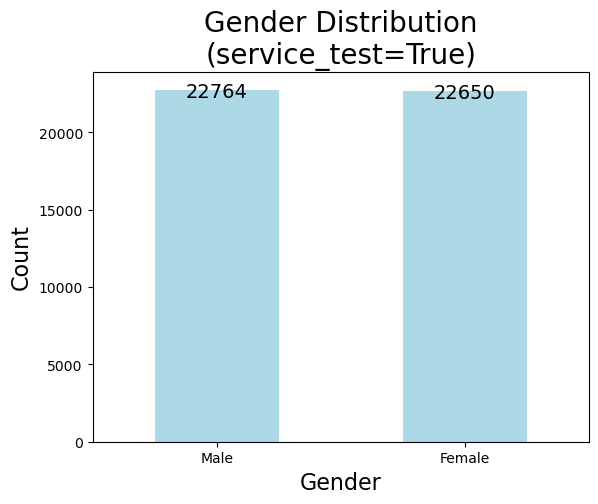

In [138]:
# Count frequency of 'gender'
balanced_labels['gender'].value_counts()

# Plot the histogram
balanced_labels['gender'].value_counts().plot(kind='bar', color = 'lightblue', rot = 0)
plt.xlabel('Gender', size = 16)
plt.ylabel('Count', size = 16)
plt.title('Gender Distribution\n(service_test=True)', size = 20)

# show values on each bar
for i, count in enumerate(balanced_labels['gender'].value_counts()):
    plt.text(i, count + 500, str(count), ha='center', va='top', size = 14)
plt.savefig('gender_dist_st.png')

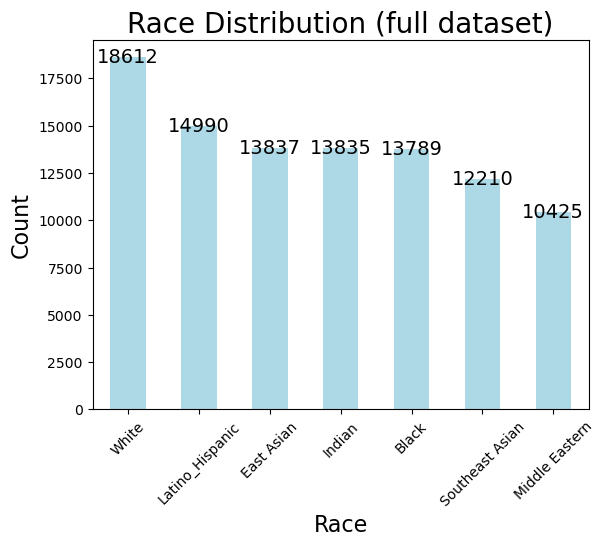

In [145]:
# count frequency of 'race'
all_labels['race'].value_counts()

# plot the histogram
all_labels['race'].value_counts().plot(kind='bar', color = 'lightblue', rot = 45)
# label x variables
plt.xlabel('Race', size = 16)
plt.ylabel('Count', size = 16)
plt.title('Race Distribution (full dataset)', size = 20)


# show values on each bar
for i, count in enumerate(all_labels['race'].value_counts()):
    plt.text(i, count + 500, str(count), ha='center', va='top', size = 14)
plt.savefig('race_dist_all.png')

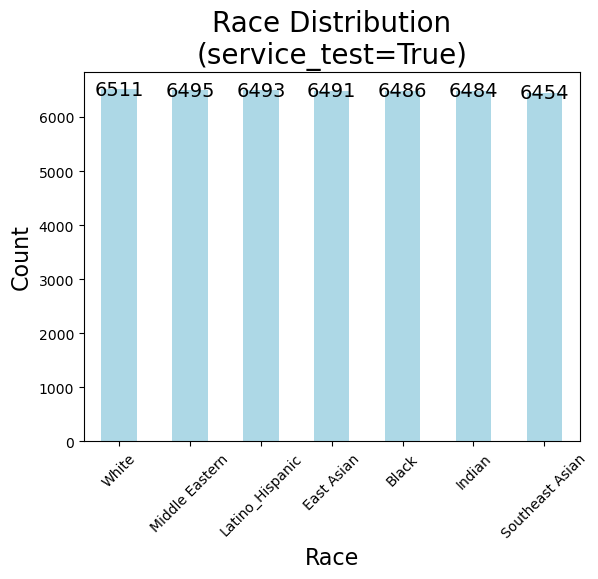

In [148]:
# count frequency of 'race'
balanced_labels['race'].value_counts()

# plot the histogram
balanced_labels['race'].value_counts().plot(kind='bar', color = 'lightblue', rot = 45)
# label x variables
plt.xlabel('Race', size = 16)
plt.ylabel('Count', size = 16)
plt.title('Race Distribution\n(service_test=True)', size = 20)


# show values on each bar
for i, count in enumerate(balanced_labels['race'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='center', size = 14)
#plt.savefig('race_dist_st.png')

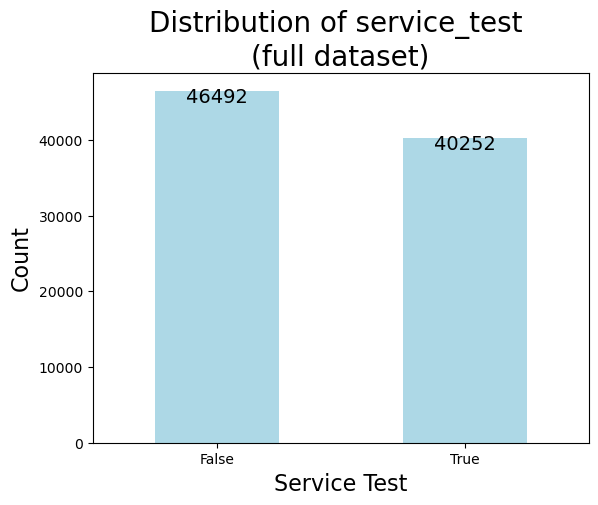

In [101]:
# count frequency of 'service_test'
train_ds['service_test'].value_counts()

# plot the histogram
train_ds['service_test'].value_counts().plot(kind='bar', color = 'lightblue', rot = 0)
# label x variables
plt.xlabel('Service Test', size = 16)
plt.ylabel('Count', size = 16)
plt.title('Distribution of service_test \n(full dataset)', size = 20)

# show values on each bar
for i, count in enumerate(train_ds['service_test'].value_counts()):
    plt.text(i, count + 500, str(count), ha='center', va='top', size = 14)
#plt.savefig('service_test_dist_all.png')

In [119]:
all_minus_file = all_labels.drop(columns = ['file', 'service_test'])
display(all_minus_file.groupby('age').gender.value_counts().to_frame().unstack())
display(all_minus_file.groupby('age').race.value_counts().to_frame().unstack())

count       
gender       Female   Male
age                       
0-2             768   1223
10-19          5629   4655
20-29         16095  12803
3-9            5254   6510
30-39          9438  12142
40-49          4591   7506
50-59          2494   4530
60-69          1154   1946
more than 70    497    463

count                                                   \
race         Black East Asian Indian Latino_Hispanic Middle Eastern   
age                                                                   
0-2            304        457    187             208            144   
10-19         1721       1321   1715            1824            820   
20-29         3574       5414   3460            3961           2647   
3-9           2328       1956   1713            1767            837   
30-39         2956       2640   3119            3272           2697   
40-49         1647       1066   1834            2218           1713   
50-59          856        582   1114            1255            942   
60-69          311        300    501             400            491   
more than 70    92        101    192              85            134   

                                    
race         Southeast Asian White  
age                                 
0-2                      248   443  
10-19                   1568  1315  
20-29                   3980  5862  
3-9                     1730  1433  
30-39                   2277  4619  
40-49                   1185  2434  
50-59                    691  1584  
60-69                    346   751  
more than 70             185   171

<Axes: xlabel='age'>

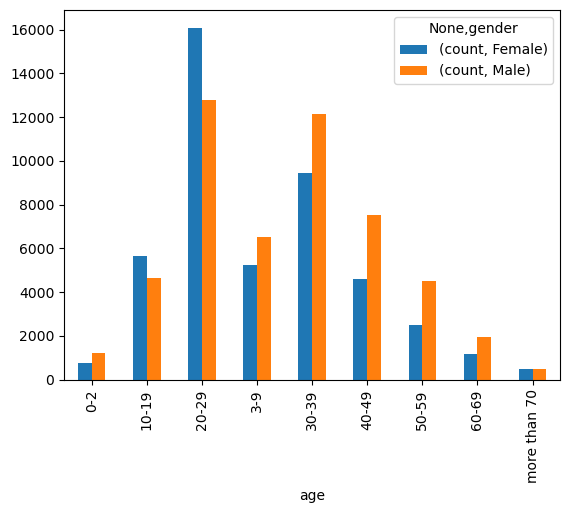

In [121]:
all_minus_file.groupby('age').gender.value_counts().to_frame().unstack().plot(kind = 'bar')

<Axes: xlabel='age'>

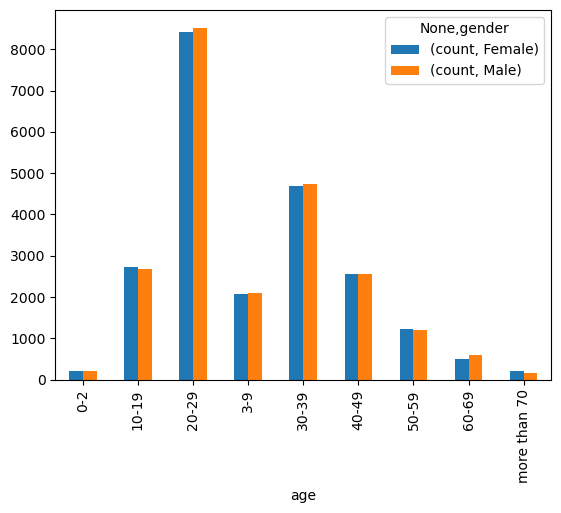

In [122]:
balanced_minus_file.groupby('age').gender.value_counts().to_frame().unstack().plot(kind = 'bar')

Text(0.5, 1.0, 'Distribution of races across age groups (full dataset)')

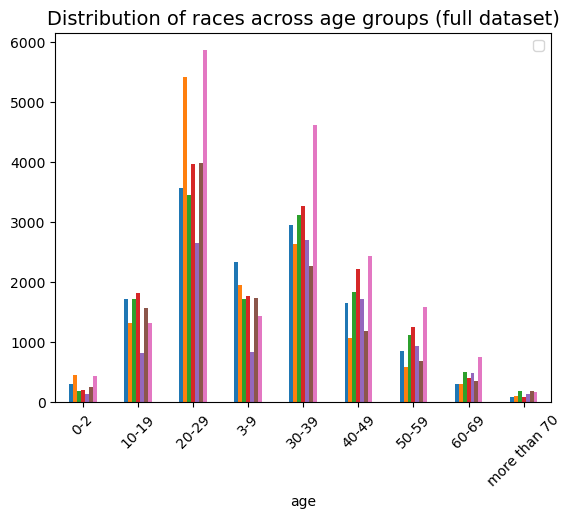

In [131]:
all_minus_file.groupby('age').race.value_counts().to_frame().unstack().plot(kind = 'bar', rot = 45)
plt.legend('')
plt.title('Distribution of races across age groups (full dataset)', size = 14)

Text(0.5, 1.0, 'Distribution of races across age groups\n(service_test=True)')

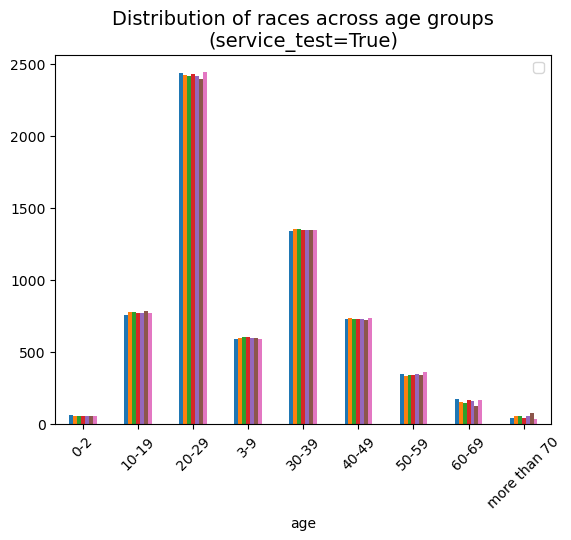

In [132]:
balanced_minus_file.groupby('age').race.value_counts().to_frame().unstack().plot(kind = 'bar', rot = 45)
plt.legend('')
plt.title('Distribution of races across age groups\n(service_test=True)', size = 14)

In [118]:
balanced_minus_file = balanced_labels.drop(columns = ['file', 'service_test'])
display(balanced_minus_file.groupby('age').gender.value_counts().to_frame().unstack())
display(balanced_minus_file.groupby('age').race.value_counts().to_frame().unstack())

count      
gender       Female  Male
age                      
0-2             202   210
10-19          2719  2689
20-29          8427  8526
3-9            2085  2107
30-39          4701  4729
40-49          2566  2549
50-59          1221  1202
60-69           509   602
more than 70    220   150

count                                                   \
race         Black East Asian Indian Latino_Hispanic Middle Eastern   
age                                                                   
0-2             62         57     56              59             60   
10-19          756        776    778             774            773   
20-29         2435       2422   2416            2428           2416   
3-9            593        599    605             603            600   
30-39         1342       1352   1351            1345           1349   
40-49          733        734    728             732            728   
50-59          347        338    341             342            351   
60-69          175        157    150             169            163   
more than 70    43         56     59              41             55   

                                    
race         Southeast Asian White  
age                                 
0-2                       58    60  
10-19                    782   769  
20-29                   2395  2441  
3-9                      599   593  
30-39                   1346  1345  
40-49                    726   734  
50-59                    341   363  
60-69                    130   167  
more than 70              77    39

C:\Users\n_oha\AppData\Local\Temp\ipykernel_12352\2529780838.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(labels[:len(train_ds['age'].unique())])


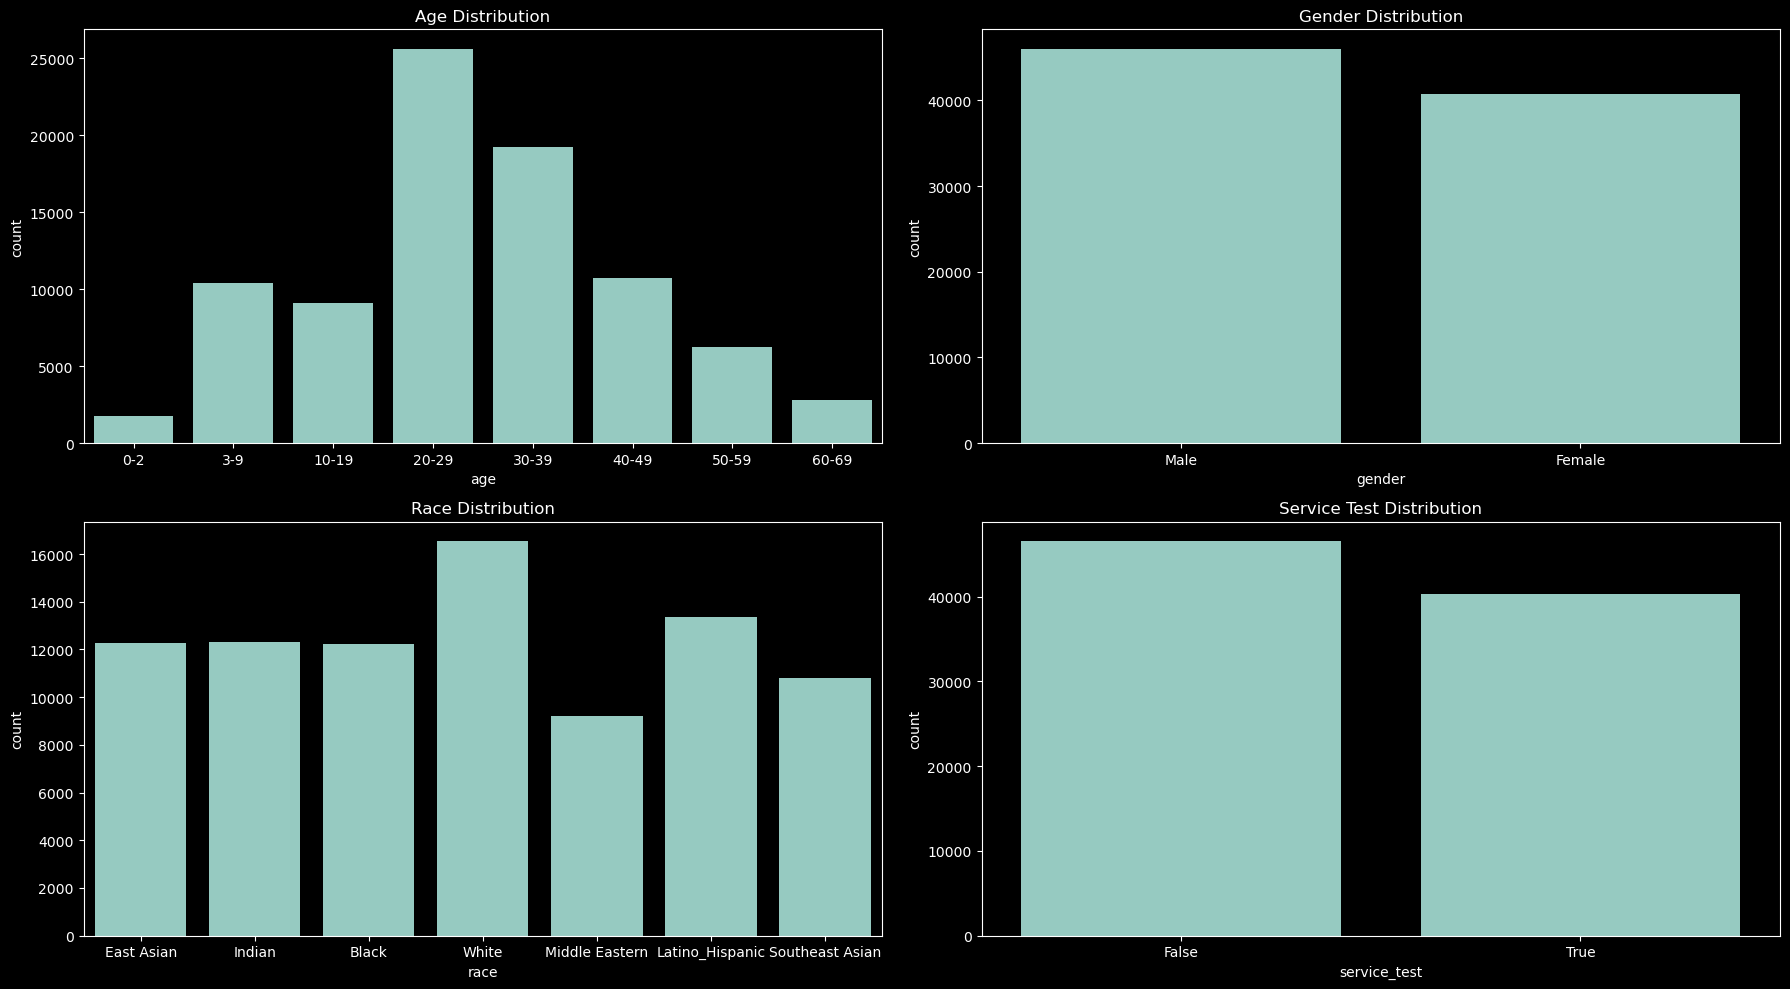

In [15]:
# Distribution of the Classes (age, gender, race, service_test)
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.countplot(ax=axes[0, 0], x='age', data=train_ds)
labels = [key for key, _ in sorted(age_mapping.items(), key=lambda item: item[1])]
axes[0, 0].set_xticklabels(labels[:len(train_ds['age'].unique())])
axes[0, 0].set_title('Age Distribution')

sns.countplot(ax=axes[0, 1], x='gender', data=train_ds)
axes[0, 1].set_title('Gender Distribution')

sns.countplot(ax=axes[1, 0], x='race', data=train_ds)
axes[1, 0].set_title('Race Distribution')

sns.countplot(ax=axes[1, 1], x='service_test', data=train_ds)
axes[1, 1].set_title('Service Test Distribution')

plt.tight_layout()
plt.show()


In [16]:
# Correlation between race and service_test
pd.crosstab(train_ds.race, train_ds.service_test)


service_test,False,True
race,,
Black,6479,5754
East Asian,6515,5772
Indian,6565,5754
Latino_Hispanic,7611,5756
Middle Eastern,3502,5714
Southeast Asian,5070,5725
White,10750,5777


In [17]:
# Correlation between age and service_test
pd.crosstab(train_ds['age'], train_ds['service_test'])



service_test,False,True
age,,
1.0,1414,378
2.0,6721,3687
3.0,4326,4777
4.0,10582,15016
5.0,10852,8398
6.0,6208,4536
7.0,4095,2133
8.0,1775,1004


In [166]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
all_labels.loc[:, 'gender'] = le.fit_transform(all_labels['gender'])
all_labels.loc[:, 'race'] = le.fit_transform(all_labels['race'])
balanced_labels.loc[:, 'gender'] = le.fit_transform(balanced_labels['gender'])
balanced_labels.loc[:, 'race'] = le.fit_transform(balanced_labels['race'])


# Calculate correlation
display(all_labels[['age', 'gender', 'race']].corr().round(4))
display(balanced_labels[['age', 'gender', 'race']].corr().round(4))

,age,gender,race
age,1.0000,0.0819,0.0878
gender,0.0819,1.0000,0.0348
race,0.0878,0.0348,1.0000


,age,gender,race
age,1.0000,0.0032,-0.0010
gender,0.0032,1.0000,-0.0019
race,-0.0010,-0.0019,1.0000


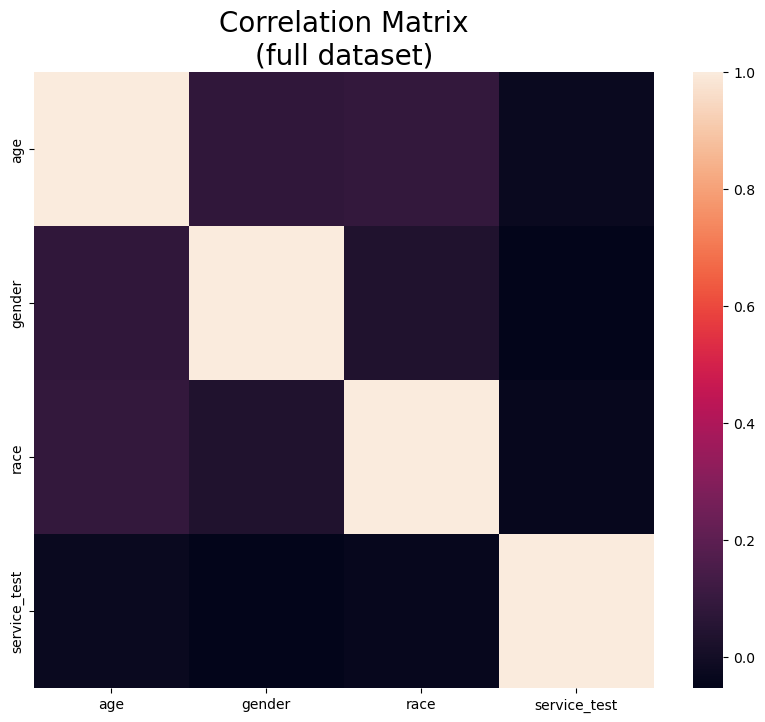

In [172]:
# correlation

f, ax = plt.subplots(figsize=(10, 8))

# Entire DataFrame
all_labels_minus_file = all_labels.drop(columns = 'file')
corr = all_labels_minus_file.corr()
sns.heatmap(corr, annot_kws={'size': 20}, ax=ax)
ax.set_title(
    "Correlation Matrix\n(full dataset)", fontsize=20)

#plt.savefig('corr_matrix_all.png')

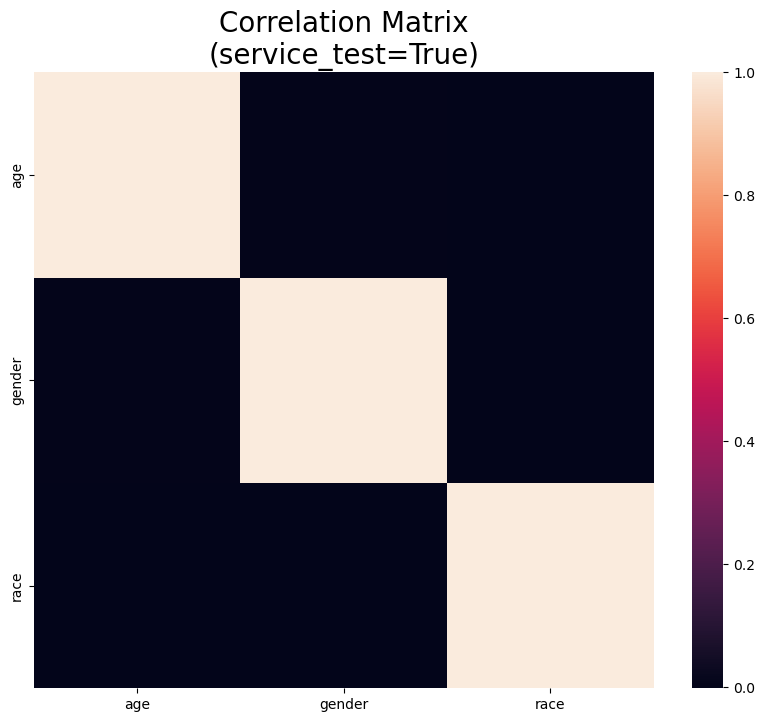

In [173]:
# correlation

f, ax = plt.subplots(figsize=(10, 8))

# Entire DataFrame
balanced_labels_minus_file = balanced_labels.drop(columns = ['file', 'service_test'])
corr = balanced_labels_minus_file.corr()
sns.heatmap(corr, annot_kws={'size': 20}, ax=ax)
ax.set_title(
    "Correlation Matrix\n(service_test=True)", fontsize=20)

plt.savefig('corr_matrix_st.png')

### One-Hot Encoding

In [20]:
# one-hot encoding of categorical variables
train_ds = pd.get_dummies(train_ds)

print('Training Features shape: ', train_ds.shape)


Training Features shape:  (86744, 4)


In [21]:
train_ds.head(5)


,age,gender,race,service_test
0,7.0,1,1,True
1,5.0,0,2,False
2,2.0,0,0,False
3,4.0,0,2,True
4,4.0,0,2,True


================================
#### Load validation data set

In [ ]:
# Load the validation label dataset
file_id = '1wOdja-ezstMEp81tX1a-EYkFebev4h7D'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
response = requests.get(url)
val_ds = pd.read_csv(io.StringIO(response.text))


In [ ]:
val_ds.info()


In [ ]:
val_ds.head(5)


In [ ]:

col_names = ['file', 'age', 'gender', 'race', 'service_test']

for col in col_names:

    print(val_ds[col].value_counts())


================================
#### Images

In [85]:
# Load image dataset from url
def load_image_dataset(url):
	response = requests.get(url)
	return pd.read_csv(io.StringIO(response.jpg))


image_ds = load_image_dataset(
	'https://drive.google.com/uc?export=download&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86')

AttributeError: 'Response' object has no attribute 'jpg'

In [ ]:
image_ds

In [92]:
from zipfile import ZipFile

In [94]:
with ZipFile('fairface-img-margin025-trainval.zip', 'r') as zip_ref:
    my_zip = zip_ref.printdir()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [95]:
my_zip